# Estimating Head/Tail Probability

This is to demonstrate how we can estimate the probability for heads/tails in **n** random throws.  
We already know the probability of both Heads/Tails will converge to 1 as sample size increases.  
The main idea here is to use the previous data and use that to get a smoother graph.  
Will try later to use this idea more on the other notebooks as well.  

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def head_tail_once(n):
    """Perform one complete fresh coin toss experiment of size n."""
    head_count = 0
    tail_count = 0
    for _ in range(n):
        if random.randint(0,1):
            head_count += 1
    tail_count = n - head_count
    return head_count/n, tail_count/n

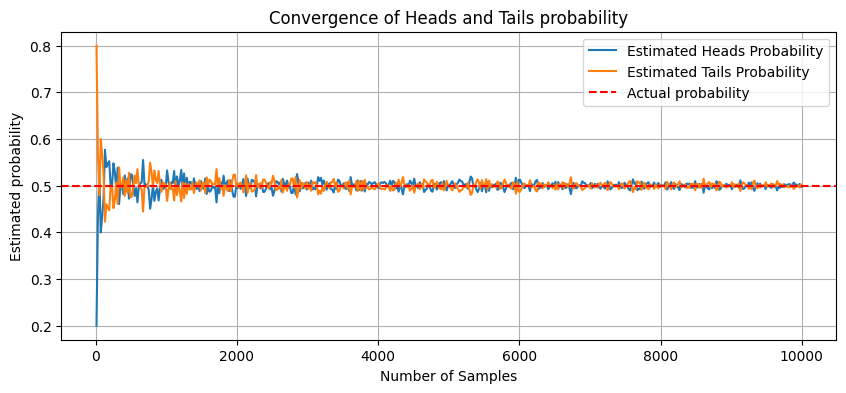

In [19]:
def convergence_plot(start = 10, max_samples=100000, step=1000):
    random.seed(42)  # For reproducibility
    heads = []
    tails = []
    samples = list(range(start, max_samples + 1, step))

    for n in samples:
        h, t = head_tail(n)
        heads.append(h)
        tails.append(t)

    plt.figure(figsize=(10, 4))
    plt.plot(samples, heads, label="Estimated Heads Probability")
    plt.plot(samples, tails, label="Estimated Tails Probability")
    
    plt.axhline(0.5, color='r', linestyle='--', label="Actual probability")
    plt.xlabel("Number of Samples")
    plt.ylabel("Estimated probability")
    plt.title("Convergence of Heads and Tails probability")
    plt.legend()
    plt.grid(True)
    plt.show()

start = 10
step = 20
max_samples = 10000
#convergence_plot()
convergence_plot(start, max_samples, step)

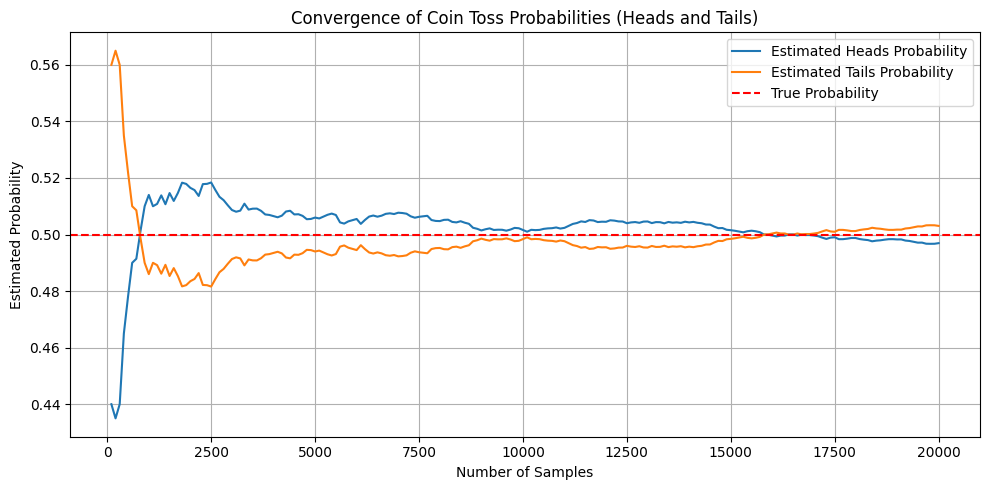

In [32]:
def head_tail_incremental(max_samples, step):
    """Uses the previous data sample to calculate the further number of trials"""
    heads = []
    tails = []
    samples = list(range(step, max_samples + 1, step))

    # Flip all the coins at once
    flips = [random.randint(0,1) for _ in range(max_samples)]

    for n in samples:
        sample = flips[:n]
        head_count = sum(sample)
        tail_count = n - head_count
        heads.append(head_count/n)
        tails.append(tail_count/n)

    return samples, heads, tails

def convergence(start=10, max_samples=20000, step=100):
    random.seed(42) # For reproducibility. Very important lesson haha

    samples, heads, tails = head_tail_incremental(max_samples, step)
    plt.figure(figsize=(10, 5))
    plt.plot(samples, heads, label="Estimated Heads Probability")
    plt.plot(samples, tails, label="Estimated Tails Probability")
    plt.axhline(0.5, color='red', linestyle='--', label="True Probability")

    plt.xlabel("Number of Samples")
    plt.ylabel("Estimated Probability")
    plt.title("Convergence of Coin Toss Probabilities (Heads and Tails)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

start = 10
step = 100
max_samples = 50000
convergence()
#convergence(start, max_samples, step)


    
    
        